#import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Import dataset

In [2]:
dataset = pd.read_csv("Smart_Watch_Reviews.csv")
X = dataset.iloc[:,5:-1].values
y = dataset.iloc[:,-6].values

#Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,y , test_size = 0.25, random_state=0)

#Feature Scaling and RandomForest Model


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Sample data, replace it with your actual dataset
data = {'year': [2023],
        'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
        'category': ['A','B','C', 'D'],
        'target': ['Watch A', 'Watch B ', 'Watch C', 'Watch D']}



# Separate your features (X) and target variable (y)
X = dataset.drop(['ReviewDate'], axis=1)
y = dataset['ProductName']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical columns
numeric_features = X.columns.drop(categorical_columns)
numeric_transformer = Pipeline(steps=[('dummy', 'passthrough')])  # No transformation for numerical features

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the pipeline with the preprocessor and the RandomForestRegressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(n_estimators=10, random_state=0))])



#Data visualization

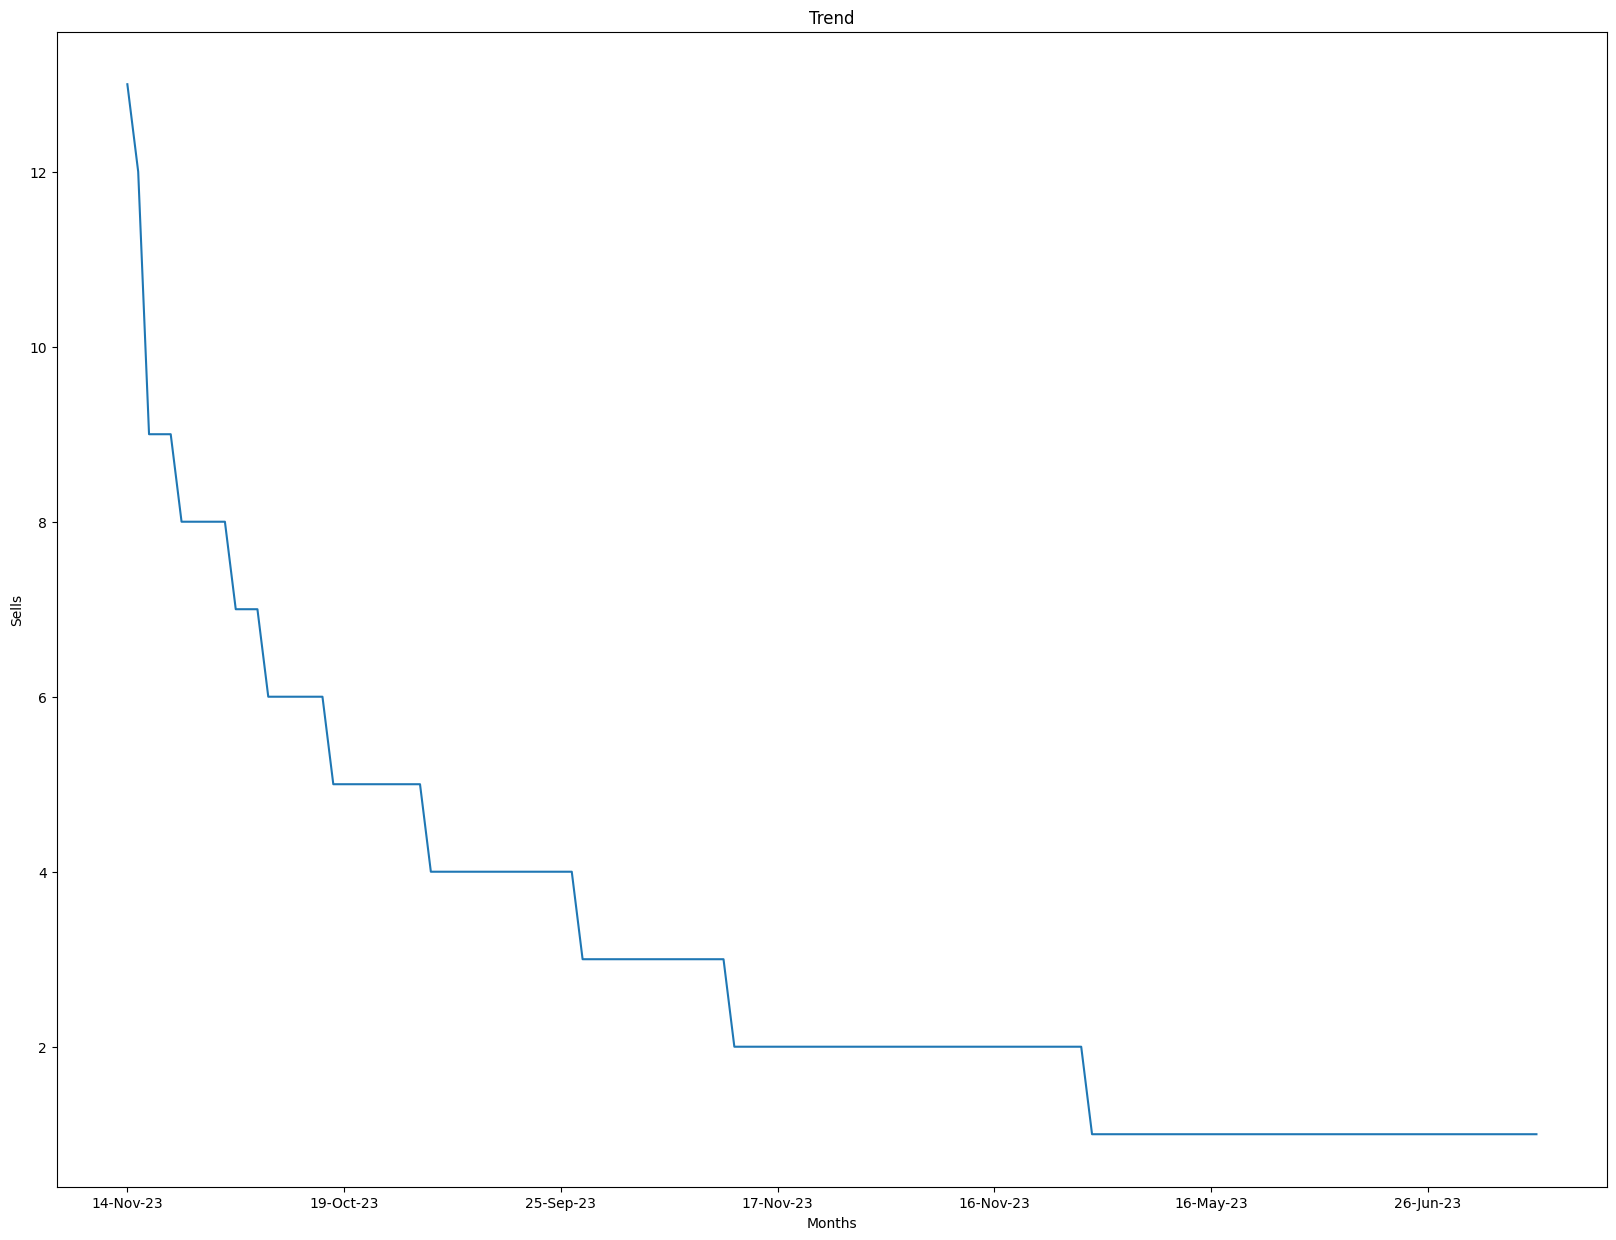

In [6]:
A= dataset['ReviewDate'].value_counts() \
    .plot(kind='line',
          title='Trend',
          figsize=(20, 15))
A.set_xlabel('Months')
A.set_ylabel('Sells')
plt.show()